## Desafio - Lucas Galvão

## Bibliotecas

In [346]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

## Tratamento dos dados retirados do site tecmundo

### Preenchimento das listas

In [456]:
noticia_tm = []
data_tm = []
hora_tm = []
materia_tm = []
autor_tm = []
compartilhamentos_tm = []
comentarios_tm = []
tags_tm = []
origem_tm = []

u = "https://www.tecmundo.com.br/novidades?page="

for x in range(1,6):
    y = str(x)
    z = u+y
    page = requests.get(z)
    soup = BeautifulSoup(page.content, 'html.parser')
    links = soup.find_all(class_="tec--card__info")
    
    for link in links:
        l = link.find('a').get('href')
        url = requests.get(l)
        artigo = BeautifulSoup(url.content, 'html.parser')
        mat = artigo.find(class_="tec--article__body")
        materia_tm.append(mat.get_text())
        
        au = artigo.find(class_="tec--author__info__link")
        try:
            autor_tm.append(au.get_text())
        except AttributeError:
            autor_tm.append("-")
        
        n = link.find(class_ = "tec--card__title__link")
        noticia_tm.append(n.get_text())
        
        t = artigo.find(id="js-article-date")
        t = t.get_text()
        t = t.split(" ")
        data_tm.append(t[1])
        hora_tm.append(t[3])
        
        com = artigo.find(class_="tec--toolbar__item").get_text()
        com = com.split(" ")
        compartilhamentos_tm.append(int(com[1]))
        
        comen = artigo.find(id="js-comments-btn").get_text()
        comen = comen.split(" ")
        comentarios_tm.append(int(comen[2]))
        
        tg = artigo.find(id="js-categories").get_text()
        tg = tg.split("   ")
        for oc in range(len(tg)):
            tg[oc] = tg[oc].replace(" ","")
        tags_tm.append(tg)
        
        origem_tm.append("Techmundo")

### Formação da tabela com os valores obtidos

In [466]:
tecmundo = pd.DataFrame ({
    "Título": noticia_tm,
    "Autor": autor_tm,
    "Conteúdo": materia_tm,
    "Data": data_tm,
    "Hora": hora_tm,
    "Tags": tags_tm,
    "Comentários": comentarios_tm,
    "Compartilhamentos": compartilhamentos_tm,
    "Site": origem_tm
})

In [465]:
tag_tm = {}

for linha in tags_tm:
    for t in linha:
        if t in tag_tm.keys():
            tag_tm[t] += 1
        else:
            tag_tm[t] = 1
                
tag_tm_ord = dict(sorted(tag_tm.items(), key=lambda x: x[1], reverse=True))

## Tratamento dos dados retirados do site techtudo

### Preenchimento das listas

In [457]:
u = "https://www.techtudo.com.br/plantao/feed/pagina-"
noticia_tt = []
data_tt = []
hora_tt = []
materia_tt = []
autor_tt = []
tags_tt = []
origem_tt = []

for x in range(1,11):
    y = str(x)
    w = y + ".html"
    z = u+w
    if (x == 1):
        z = "https://www.techtudo.com.br/plantao.html"
    page = requests.get(z)
    soup = BeautifulSoup(page.content, 'html.parser')
    links = soup.find_all(class_="feed-post-body")

    for link in links:
        l = link.find('a').get('href')
        url = requests.get(l)
        artigo = BeautifulSoup(url.content, 'html.parser')
        
        mat = artigo.find(itemprop="articleBody")
        try:
            materia_tt.append(mat.get_text())
        except AttributeError:
            materia_tt.append("-")
        
        tg = artigo.find(class_="entities__list").get_text()
        tg = tg.split("     ")
        #Retirar espaços em branco
        tg[0] = tg[0].split(" ")
        tg[0] = tg[0][-1]
        tg[-1] = tg[-1].split(" ")
        tg[-1] = tg[-1][0]
        tags_tt.append(tg)
        
        
        au = artigo.find(class_="content-publication-data__from")
        try:
            aut = au.get_text()       
        except AttributeError:
            aut = "-"
        if aut != "-":
            aut = aut.split(",")
            cort = aut[0].split(" ")
            aut = cort[2]
            for i in range(3, len(cort)):
                aut = aut+" "+cort[i]
        autor_tt.append(aut)
        
        t = artigo.find(itemprop="datePublished")
        t = t.get_text()
        t = t.split(" ")
        data = t[1]
        hora = t[2]
        hora = hora.split("h")
        hora = hora[0]+":"+hora[1]
        data_tt.append(data)
        hora_tt.append(hora)
        
        n = link.find(class_="feed-post-link gui-color-primary gui-color-hover")
        noticia_tt.append(n.get_text())
        
        origem_tt.append("Techtudo")      

### Formação da tabela com valores obtidos

In [463]:
techtudo = pd.DataFrame ({
    "Título": noticia_tt,
    "Autor": autor_tt,
    "Conteúdo": materia_tt,
    "Data": data_tt,
    "Hora": hora_tt,
    "Tags": tags_tt,
    "Site": origem_tt
})

In [464]:
tag_tt = {}

for linha in tags_tt:
    for t in linha:
        if t in tag_tt.keys():
            tag_tt[t] += 1
        else:
            tag_tt[t] = 1
                
tag_tt_ord = dict(sorted(tag_tt.items(), key=lambda x: x[1], reverse=True))

## Tratamento dos dados retirados do site Olhar Digital

### Preenchimento das listas

In [458]:
noticia_od = []
data_od = []
hora_od = []
materia_od = []
autor_od = []
tags_od = []
origem_od = []

u = "https://olhardigital.com.br/noticias/"
for x in range(1,6):
    y = str(x)
    z = u+y
    page = requests.get(z)
    soup = BeautifulSoup(page.content, 'html.parser')
    links = soup.find_all(class_="blk-item i-img-left i-com-txt i-com-tpo i-full-width")
    
    for link in links:
        l = link.get('href')
        l = "https:"+l
        url = requests.get(l)
        artigo = BeautifulSoup(url.content, 'html.parser')
        mat = artigo.find(class_="mat-txt")
        materia_od.append(mat.get_text())
        
        au = artigo.find(class_="meta-item meta-aut").get_text()
        au = au.split(",")
        au = au[0]
        autor_od.append(au)

        
        n = link.find(class_ = "ite-nfo nfo-tit")
        noticia_od.append(n.get_text())
        
        d = artigo.find(class_="meta-item meta-pub-d").get_text()
        h = artigo.find(class_="meta-item meta-pub-h").get_text()
        h = h.split("h")
        h = h[0]+":"+h[1]
        data_od.append(d)
        hora_od.append(h)
        
        
        tg = artigo.find(class_="mat-tags").get_text()
        tg = tg.splitlines()
        tg = tg[1]
        tg = tg.split(" ")
        tags_od.append(tg)
        
        origem_od.append("Olhar Digital")

### Formação da tabela com os valores obtidos

In [462]:
olhar_digital = pd.DataFrame ({
    "Título": noticia_od,
    "Autor": autor_od,
    "Conteúdo": materia_od,
    "Data": data_od,
    "Hora": hora_od,
    "Tags": tags_od,
    "Site": origem_od
})

In [461]:
tag_od = {}
filt = list(range(20))
filt = str(filt)
filt = list(filt)
filt.extend(['a', 'de', 'e', 'o', 'r', 'n', 't', 'G', 's', 'm', 'f', 'S', 'w', 'i', 'c', 'I', 'v'])

for linha in tags_od:
    for t in linha:
        if t not in filt:
            if t in tag_od.keys():
                tag_od[t] += 1
            else:
                tag_od[t] = 1
                
tag_od_ord = dict(sorted(tag_od.items(), key=lambda x: x[1], reverse=True))

## Tratamento dos dados retirados do site Canaltech

In [483]:
noticia_ct = []
data_ct = []
hora_ct = []
materia_ct = []
autor_ct = []
tags_ct = []
origem_ct = []

u = "https://canaltech.com.br/ultimas/p"
for x in range(1,16):
    y = str(x)
    z = u+y
    page = requests.get(z)
    soup = BeautifulSoup(page.content, 'html.parser')
    links = soup.find_all(class_="jc list-item type-artigo timeline-fade")
    
    for link in links:
        l = link.get('href')
        l = "https://canaltech.com.br" + l
        url = requests.get(l)
        artigo = BeautifulSoup(url.content, 'html.parser')
        mat = artigo.find(class_="content")
        materia_ct.append(mat.get_text())
        
        au = artigo.find(class_="meta-info").get_text()
        au = au.splitlines()
        try:
            t = au[2]
            t = t.split(" ")
            if t[3] == "Outubro":
                t[3] = "10"
            elif t[3] == "Setembro":
                t[3] = "09"
            elif t[3] == "Agosto":
                t[3] = "08"
            d = t[1]+"/"+t[3]+"/"+t[5]
            h = t[-1].split("h")
            h = h[0]+":"+h[-1]
        except IndexError:
            d = "-"
            h = "-"
            
        data_ct.append(d)
        hora_ct.append(h)
        
        au = au[1].split(" ")
        try:
            au = au[1]+" "+au[2]
        except IndexError:
            au = "-"
        autor_ct.append(au)
               
        n = link.find(class_ = "title")
        noticia_ct.append(n.get_text())        
        
        tg = artigo.find(class_="breadcrumb").get_text()
        tg = tg.splitlines()
        try:
            tg = [tg[5], tg[8]]
        except IndexError:
            tg = tg[5]
            
        tags_ct.append(tg)
        
        origem_ct.append("Canaltech")

### Formação da tabela com valores obtidos

In [488]:
canaltech = pd.DataFrame ({
    "Título": noticia_ct,
    "Autor": autor_ct,
    "Conteúdo": materia_ct,
    "Data": data_ct,
    "Hora": hora_ct,
    "Tags": tags_ct,
    "Site": origem_ct
})

In [489]:
tag_ct = {}

filt = list(range(20))
filt.extend(['a', 'de', 'e', 'o', 'r', 'n', 't', 'G', 's', 'm', 'f', 'S', 'w', 'i', 'c', 'I', 'v'])

for linha in tags_ct:
    for t in linha:
        if t not in filt:
            if t in tag_ct.keys():
                tag_ct[t] += 1
            else:
                tag_ct[t] = 1
                
tag_ct_ord = dict(sorted(tag_ct.items(), key=lambda x: x[1], reverse=True))

## Tabela Integrada

In [490]:
noticia = noticia_tm + noticia_tt + noticia_od + noticia_ct
data = data_tm + data_tt + data_od + data_ct
hora = hora_tm + hora_tt + hora_od + hora_ct
materia= materia_tm + materia_tt + materia_od + materia_ct
autor = autor_tm + autor_tt + autor_od + autor_ct
tags = tags_tm + tags_tt + tags_od + tags_ct
origem = origem_tm + origem_tt + origem_od + origem_ct

portais = pd.DataFrame ({
    "Título": noticia,
    "Autor": autor,
    "Conteúdo": materia,
    "Data": data,
    "Hora": hora,
    "Tags": tags,
    "Site": origem
})

In [491]:
tag = {}
tag_site = {}
filt = list(range(20))
filt.extend(['a', 'de', 'e', 'o', 'r', 'n', 't', 'G', 's', 'm', 'f', 'S', 'w', 'i', 'c', 'I', 'v'])

for linha in tags:
    for t in linha:
        if t not in filt:
            if t in tag.keys():
                tag[t] += 1
            else:
                tag[t] = 1
            
tag_ord = dict(sorted(tag.items(), key=lambda x: x[1], reverse=True))

## Tags mais usadas

### Todos os sites

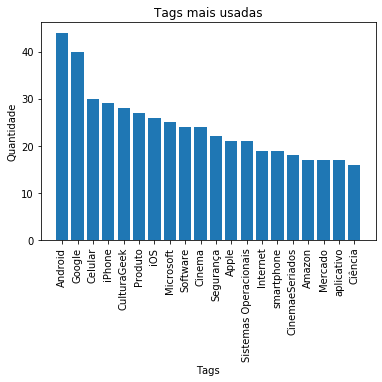

In [467]:
plt.bar(list(tag_ord.keys())[:20], list(tag_ord.values())[:20])
plt.xlabel('Tags')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.title('Tags mais usadas')
plt.show()

### Tecmundo

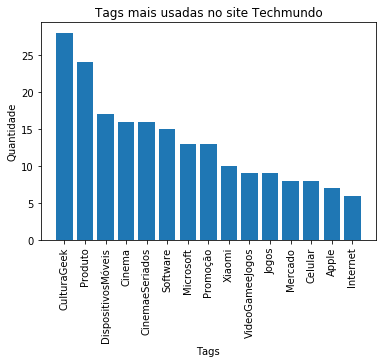

In [468]:
plt.bar(list(tag_tm_ord.keys())[:15], list(tag_tm_ord.values())[:15])
plt.xlabel('Tags')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.title('Tags mais usadas no site Techmundo')
plt.show()

In [412]:
i = 0
j = 0

# Verificação das interseções entre tags

for x in tags_tm:
    if 'CulturaGeek' in x and 'Cinema' in x:
        i += 1
        
    if 'Produto' in x and 'Software' in x:
        j += 1

print(i, " - ", i/tag_tm['Cinema'])
print(j, " - ", j/tag_tm['Software'])

18  -  1.0
0  -  0.0


A princípio o site techmundo aparenta ser muito mais voltados para cultura geek e cinema, já que são assuntos relacionados e estão entre as 3 tags mais repetidas nos últimos dias. 

Porém analisando mais esse resultado vemos que o conjunto cinema está contido no conjunto cultura geek, tornando o resultado redundante. 

Analisando os proximos resultados temos as tags produtos e software, cuja interseção é nula, apontando que os assuntos explorados pelo site são mais diversos do que uma análise inicial pelo gráfico indicaria.

Assim, as 3 principais tags observadas no site Techmundo são:
* Cultura Geek
* Produto
* Software

### Techtudo

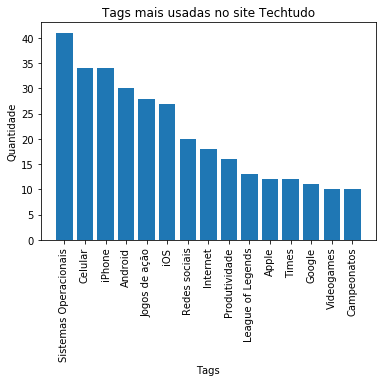

In [469]:
plt.bar(list(tag_tt_ord.keys())[:15], list(tag_tt_ord.values())[:15])
plt.xlabel('Tags')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.title('Tags mais usadas no site Techtudo')
plt.show()

In [411]:
i = 0
j = 0
k = 0

a = 0
b = 0
c = 0

# Verificação das interseções entre tags

for x in tags_tt:
    if 'Sistemas Operacionais' in x:
        if 'Celular' in x:
            i += 1
        if 'iPhone' in x:
            j += 1
        if 'Android' in x:
            k += 1
        
    if 'Celular' in x: 
        if 'iPhone' in x:
            a += 1        
        if 'Android' in x:
            b += 1
            
    if 'iPhone' in x and 'iOS' in x:
        c += 1

print(i, " - ", i/tag_tt['Celular'])
print(j, " - ", j/tag_tt['iPhone'])
print(k, " - ", k/tag_tt['Android'])

print(a, " - ", a/tag_tt['iPhone'])
print(b, " - ", b/tag_tt['Android'])

print(c, " - ", c/tag_tt['iOS'])

16  -  0.9411764705882353
13  -  0.8125
15  -  1.0
14  -  0.875
10  -  0.6666666666666666
9  -  0.6428571428571429


Igual ao site Techmundo, as tags mais usadas do site Techtudo são redundantes, a mais usada (sistemas operacionais) está presente em pelo menos 80% das ocorrências de cada umas das 3 próximas na lista.

A princípio poderia ser tirada a conclusão, baseado na utilização das tags,  que o site Techtudo é muito voltado para celulares, porém analisando melhor os dados temos que os temas abordados são mais variados.

### Olhar Digital

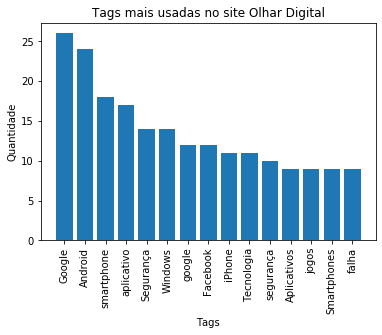

In [470]:
plt.bar(list(tag_od_ord.keys())[:15], list(tag_od_ord.values())[:15])
plt.xlabel('Tags')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.title('Tags mais usadas no site Olhar Digital')
plt.show()

In [420]:
i = 0
j = 0
k = 0

a = 0
b = 0

# Verificação das interseções entre tags

for x in tags_od:
    if 'Google' in x:
        if 'Android' in x:
            i += 1
        if 'smartphone' in x:
            j += 1
        if 'aplicativo' in x:
            k += 1
        
    if 'Android' in x: 
        if 'smatphone' in x:
            a += 1        
        if 'aplicativo' in x:
            b += 1

print(i, " - ", i/tag_od['Android'], " - ", i/tag_od['Google'])
print(j, " - ", j/tag_od['smartphone'])
print(k, " - ", k/tag_od['aplicativo'])

print(a, " - ", a/tag_od['smartphone'])
print(b, " - ", b/tag_od['aplicativo'])

6  -  0.25  -  0.2222222222222222
1  -  0.05263157894736842
2  -  0.11764705882352941
0  -  0.0
6  -  0.35294117647058826


O site Olhar Digital tem como tags mais usadas Google e Android, a princípio pode parecer redundante, porém analisando a interseção desses conjuntos temos que as tags aparecem juntas apenas 6 vezes (25% das ocorrências da tag Android e 22% da tag Google).

A mesma coisa ocorre com as próximas tag na ordem, dessa forma é possível concluir que nos últimos dias o site Olhar Digital tem notícias mais focado no Google e em celulares.

### Canaltech

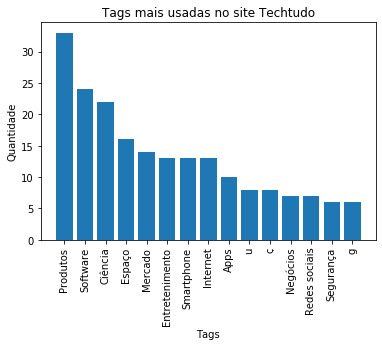

In [492]:
plt.bar(list(tag_ct_ord.keys())[:15], list(tag_ct_ord.values())[:15])
plt.xlabel('Tags')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.title('Tags mais usadas no site Techtudo')
plt.show()

In [494]:
i = 0
j = 0
k = 0
l = 0

a = 0
b = 0
c = 0

w = 0

# Verificação das interseções entre tags

for x in tags_ct:
    if 'Produtos' in x:
        if 'Mercado' in x:
            i += 1
        if 'Software' in x:
            j += 1
        if 'Espaço' in x:
            k += 1
        if 'Ciência' in x:
            l += 1
        
    if 'Mercado' in x: 
        if 'Software' in x:
            a += 1        
        if 'Ciência' in x:
            b += 1
        if 'Produtos' in x:
            c += 1
            
    if 'Ciência' in x and 'Espaço' in x:
        w += 1

print(i, " - ", i/tag_ct['Mercado'])
print(j, " - ", j/tag_ct['Software'])
print(k, " - ", k/tag_ct['Espaço'])
print(l, " - ", l/tag_ct['Ciência'])

print(a, " - ", a/tag_ct['Software'])
print(b, " - ", b/tag_ct['Ciência'])
print(c, " - ", c/tag_ct['Produtos'])

print(w, " - ", w/tag_ct['Espaço'])

0  -  0.0
0  -  0.0
0  -  0.0
0  -  0.0
0  -  0.0
0  -  0.0
0  -  0.0
16  -  1.0


O site Canaltech não possui interseção entre as suas principais tags, exceto pela tag espaço que está contida na tag ciência. No caso o site trata de assuntos diversos sem ter um foco claro.

## Publicações por dia

In [514]:
post_dia = {}

tecmundo_data = tecmundo.Data == '03/10/2019'
tecmundo_data = sum(tecmundo_data)
post_dia['tecmundo'] = tecmundo_data

techtudo_data = techtudo.Data == '03/10/2019'
techtudo_data = sum(techtudo_data)
dia.append(techtudo_data)
post_dia['techtudo'] = techtudo_data

olhardigital_data = olhar_digital.Data == '03/10/2019'
olhardigital_data = sum(olhardigital_data)
post_dia['olhar digital'] = olhardigital_data

canaltech_data = canaltech.Data == '03/10/2019'
canaltech_data = sum(canaltech_data)
post_dia['canaltech'] = canaltech_data

post_dia_ord = dict(sorted(post_dia.items(), key=lambda x: x[1], reverse=True))

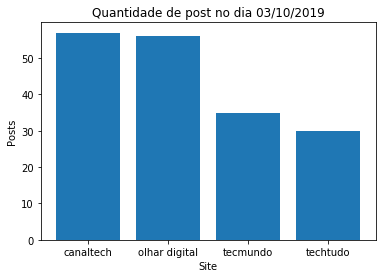

In [510]:
plt.bar(post_dia_ord.keys(), post_dia_ord.values())
plt.xlabel('Site')
plt.ylabel('Posts')
plt.title('Quantidade de post no dia 03/10/2019')
plt.show()

O gráfico acima relaciona cada site com a quantidade de matéria postadas no dia 03/10/2019, é possível ver que os sites se dividem em 2 grupos, o primeiro com Canaltech e Olhar Digital que publicaram mais de 50 matérias no dia, e o segundo com Tecmundo e Techtudo que tiveram entre 30 e 35 postagens no dia.

## Repercusão por tag no site Tecmundo

In [524]:
tag_comp = {}
tag_coment = {}
tag_comp_med = {}
tag_coment_med = {}

a = 1
b = 1

for i in range(len(tags_tm)):
    if data_tm[i] != ('04/10/2019'):
        coment = comentarios_tm[i]
        comp = compartilhamentos_tm[i]
        for t in tags_tm[i]:
            if t in tag_coment.keys():
                tag_coment[t] += coment
            else:
                tag_coment[t] = coment
            
            if t in tag_comp.keys():
                tag_comp[t] += comp
            else:
                tag_comp[t] = comp

for x in tag_comp:
    tag_comp_med[x] = tag_comp[x] / tag_tm[x]
    tag_coment_med[x] = tag_coment[x] / tag_tm[x]
    

tag_comp_ord = dict(sorted(tag_comp.items(), key=lambda x: x[1], reverse=True))
tag_coment_ord = dict(sorted(tag_coment.items(), key=lambda x: x[1], reverse=True))
tag_comp_med_ord = dict(sorted(tag_comp_med.items(), key=lambda x: x[1], reverse=True))
tag_coment_med_ord = dict(sorted(tag_coment_med.items(), key=lambda x: x[1], reverse=True))

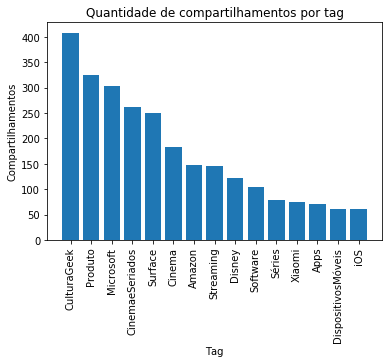

In [520]:
plt.bar(list(tag_comp_ord.keys())[:15], list(tag_comp_ord.values())[:15])
plt.xlabel('Tag')
plt.ylabel('Compartilhamentos')
plt.xticks(rotation=90)
plt.title('Quantidade de compartilhamentos por tag')
plt.show()

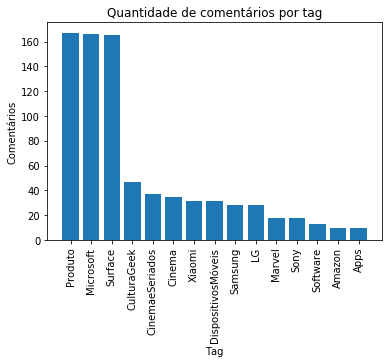

In [521]:
plt.bar(list(tag_coment_ord.keys())[:15], list(tag_coment_ord.values())[:15])
plt.xlabel('Tag')
plt.ylabel('Comentários')
plt.xticks(rotation=90)
plt.title('Quantidade de comentários por tag')
plt.show()

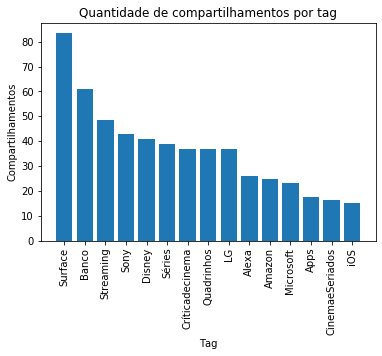

In [525]:
plt.bar(list(tag_comp_med_ord.keys())[:15], list(tag_comp_med_ord.values())[:15])
plt.xlabel('Tag')
plt.ylabel('Compartilhamentos')
plt.xticks(rotation=90)
plt.title('Quantidade de compartilhamentos médios por tag')
plt.show()

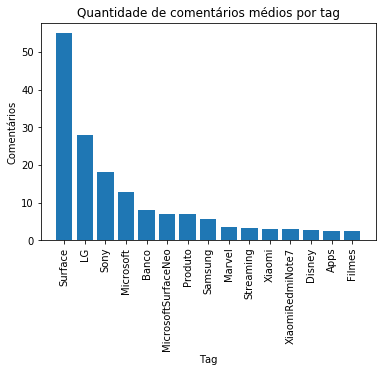

In [526]:
plt.bar(list(tag_coment_med_ord.keys())[:15], list(tag_coment_med_ord.values())[:15])
plt.xlabel('Tag')
plt.ylabel('Comentários')
plt.xticks(rotation=90)
plt.title('Quantidade de comentários médios por tag')
plt.show()

Analisando os gráficos é possível perceber que a tag que gerou maior repercusão entre os usuários do site foi a Surface, essa tag teve apenas e 3 posts e foi responsável por grande parte dos comentários do site.

A tag Surface não teve a maior quantidade absoluta de comentários, porém o motivo disso é porque ela está contida nas tags Microsoft e Produto. Se for analisada as médias de compartilhamentos e comentários por post fica claro que os altos valores absolutos dessas tags são devido ao posts da tag Surface 